# Data Cleaning

In [51]:
# Import pandas
import pandas as pd
# Read the file into a DataFrame: df
df = pd.read_csv('fifa19_dataset.csv', low_memory = False)

# Print the head of df
print(df.head())


   Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   

In [35]:
print(df['Club'].value_counts(dropna=False))

print(df['Nationality'].value_counts(dropna=False))

print(df['Age'].value_counts(dropna=False))

NaN                          241
Burnley                       33
Atlético Madrid               33
Borussia Dortmund             33
Rayo Vallecano                33
Eintracht Frankfurt           33
TSG 1899 Hoffenheim           33
Wolverhampton Wanderers       33
Newcastle United              33
Real Madrid                   33
AS Monaco                     33
RC Celta                      33
Frosinone                     33
Everton                       33
FC Barcelona                  33
Valencia CF                   33
Chelsea                       33
Arsenal                       33
Tottenham Hotspur             33
CD Leganés                    33
Liverpool                     33
Cardiff City                  33
Empoli                        33
Manchester City               33
Southampton                   33
Fortuna Düsseldorf            33
Manchester United             33
Fulham                        32
Huddersfield Town             32
Villarreal CF                 32
          

## Incredible! there are 22 players in Fifa19 that are 40 years old or more

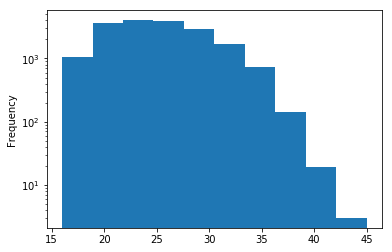

In [45]:
import matplotlib.pyplot as plt

# Describe the column
df['Club'].describe()

# Plot the histogram
df['Age'].plot(kind='hist', logx=False, logy=True)

# Display the histogram
plt.show();

## TIDY DATA!!

* Columns represent separate variables
* Rows represent individual observations
* Observational units form tables

In [1]:
import pandas as pd
names = ['Messi','Aguero','James','Lewandowski']
category = ['Shooting']*4
score = [95,85,88,92]
dict = {'player':names, 'category':category, 'score':score}
ratings = pd.DataFrame(dict)
ratings.head()

,player,category,score
0,Messi,Shooting,95
1,Aguero,Shooting,85
2,James,Shooting,88
3,Lewandowski,Shooting,92


#### How to turn columns into rows of data?
* pd.melt()

#### How to do the opposite?
* pd.pivot()  
be aware though, pivot() will throw an error if there are duplicates, for safer use, try pivot_table()

In [38]:
new_names = ['Leo','Bruce','Jacob']
experience_a = [9,10,5]
experience_b = [4,3,6]
table = {'name':new_names, 'experience_a':experience_a, 'experience_b':experience_b}
experiences = pd.DataFrame(table)
experiences.head()

,name,experience_a,experience_b
0,Leo,9,4
1,Bruce,10,3
2,Jacob,5,6


In the next snipped of code I am going to melt the columns experience_a & experience_b

In [40]:
fixed_experiences = pd.melt(experiences, id_vars=['name'])
fixed_experiences.head(6)

,name,variable,value
0,Leo,experience_a,9
1,Bruce,experience_a,10
2,Jacob,experience_a,5
3,Leo,experience_b,4
4,Bruce,experience_b,3
5,Jacob,experience_b,6


## Concatenating Data

In [7]:
import pandas as pd
names_two = ['Ronaldo','Mbappe','Neymar','Suarez']
category_two = ['shooting']*4
scores = [95,85,88,92]
dict_two = {'player':names_two, 'category':category_two, 'score':scores}
ratings_two = pd.DataFrame(dict_two)
print(ratings_two.head())
print(type(ratings_two))

    player  category  score
0  Ronaldo  shooting     95
1   Mbappe  shooting     85
2   Neymar  shooting     88
3   Suarez  shooting     92
<class 'pandas.core.frame.DataFrame'>


## Okay! So now I'm going to concatenate the following DataFrames:  
- ratings
- ratings_two

In [9]:
concatenated = pd.concat([ratings, ratings_two])
print(concatenated)

        player  category  score
0        Messi  Shooting     95
1       Aguero  Shooting     85
2        James  Shooting     88
3  Lewandowski  Shooting     92
0      Ronaldo  shooting     95
1       Mbappe  shooting     85
2       Neymar  shooting     88
3       Suarez  shooting     92


## But wait! the indexes are all messed up
In order to fix this, I will use the 'ignore_index=True' field inside pd.concat()

In [15]:
concatenated = pd.concat([ratings, ratings_two], ignore_index=True)
print(concatenated)

        player  category  score
0        Messi  Shooting     95
1       Aguero  Shooting     85
2        James  Shooting     88
3  Lewandowski  Shooting     92
4      Ronaldo  shooting     95
5       Mbappe  shooting     85
6       Neymar  shooting     88
7       Suarez  shooting     92


### Much better now!

Now, if I want to concatenate a column, for example, a category called 'dribbling' to my DataFrame, all I have to do is the following:

In [17]:
dribbling = [94, 85, 86, 85, 92, 88, 95, 87] #create new category
d_category = {'dribbling':dribbling}
df = pd.DataFrame(d_category)
merged_stats = pd.concat([concatenated,df],axis=1)
print(merged_stats)

        player  category  score  dribbling
0        Messi  Shooting     95         94
1       Aguero  Shooting     85         85
2        James  Shooting     88         86
3  Lewandowski  Shooting     92         85
4      Ronaldo  shooting     95         92
5       Mbappe  shooting     85         88
6       Neymar  shooting     88         95
7       Suarez  shooting     92         87


In [52]:
print(merged_stats.describe())
print('\n')
print(merged_stats.info())
print('\n')
print(merged_stats.values)

           score  dribbling
count   8.000000   8.000000
mean   90.000000  89.000000
std     4.070802   4.070802
min    85.000000  85.000000
25%    87.250000  85.750000
50%    90.000000  87.500000
75%    92.750000  92.500000
max    95.000000  95.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
player       8 non-null object
category     8 non-null object
score        8 non-null int64
dribbling    8 non-null int64
dtypes: int64(2), object(2)
memory usage: 336.0+ bytes
None


[['Messi' 'Shooting' 95 94]
 ['Aguero' 'Shooting' 85 85]
 ['James' 'Shooting' 88 86]
 ['Lewandowski' 'Shooting' 92 85]
 ['Ronaldo' 'shooting' 95 92]
 ['Mbappe' 'shooting' 85 88]
 ['Neymar' 'shooting' 88 95]
 ['Suarez' 'shooting' 92 87]]


## And there we have it!
I successfully added a column called "dribbling" to my existing DataFrame

## Merging DataFrames!

In [27]:
import pandas as pd
data = [['Idaho', 1717000], ['Texas', 28300000], ['Florida', 20980000],['Alaska',739795]]
df1 = pd.DataFrame(data,columns=['State','Population'])
print(df1)

     State  Population
0    Idaho     1717000
1    Texas    28300000
2  Florida    20980000
3   Alaska      739795


In [29]:
data_part_two = [['Idaho', 'ID'], ['Texas', 'TX'], ['Florida', 'FL'],['Alaska','AK']]
df2 = pd.DataFrame(data_part_two,columns=['Name','ANSI'])
print(df2)

      Name ANSI
0    Idaho   ID
1    Texas   TX
2  Florida   FL
3   Alaska   AK


### Now I want to merge both DataFrames...

In [32]:
merged_data = pd.merge(left=df1, right=df2, on=None, left_on='State', right_on='Name')
print(merged_data)

     State  Population     Name ANSI
0    Idaho     1717000    Idaho   ID
1    Texas    28300000    Texas   TX
2  Florida    20980000  Florida   FL
3   Alaska      739795   Alaska   AK


### Successfully merged DataFrames! ^^^

## How to change the dtype of a column to int/float?
```
pd.to_numeric(dataframe.column)
```
if the column has any string data it will throw an error... In order to get rid of it, use errors='coerce' inside the function which will turn the bad values into NaN

## Dropping duplicates/Dealing with missing data

#### to drop all duplicates from a dataset:
```
.drop_duplicates()
```
#### to replace NaN values in a column with a certain value:
```
mean = dataframe.column.mean()
dataframe[column] = dataframe.column.fillna(mean)
```
#### if I want to replace all NaN values in the dataset:
```
dataframe = dataframe.fillna(value=0)
```

## Checking your data? use assert

i.e.
```
assert gapminder.year.dtypes == np.int64
```
here, I am checking that all values in the year column are of type int64